Group Member: Gege Li, Zhijing Zhang

  We choose to define three research and analytical questions from the perspective of passengers.
    The three questions start from when the passengers choose the airports, then choose the flights and see the flights table in the airport. We will use some pandas to add, remove and transform data within this data frame. And use some basic statistics and graphics to show our exploratory answers and analytics to the questions passengers care about.

In [6]:
#get the data set
import pandas as pd
from pandas import  Series, DataFrame

filename = 'https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv'
flights  = pd.read_csv(filename)

#show the head of the data set to make sure we can use it
print(flights.head())

   Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime UniqueCarrier  \
0  2011      1           1          6   1400.0   1500.0            AA   
1  2011      1           2          7   1401.0   1501.0            AA   
2  2011      1           3          1   1352.0   1502.0            AA   
3  2011      1           4          2   1403.0   1513.0            AA   
4  2011      1           5          3   1405.0   1507.0            AA   

   FlightNum TailNum  ActualElapsedTime   ...     ArrDelay  DepDelay  Origin  \
0        428  N576AA               60.0   ...        -10.0       0.0     IAH   
1        428  N557AA               60.0   ...         -9.0       1.0     IAH   
2        428  N541AA               70.0   ...         -8.0      -8.0     IAH   
3        428  N403AA               70.0   ...          3.0       3.0     IAH   
4        428  N492AA               62.0   ...         -3.0       5.0     IAH   

  Dest Distance  TaxiIn  TaxiOut  Cancelled  CancellationCode Diverted  
0  DFW 

 The first questions is: 
 Which airpot has a higher rate of delay in IAH and HOU?
     Passengers would like to choose the one with lower rate of delay. And this is the first step when they go to by a plane. As a data analyst, we should show them the delay of this two airports in order to provide them a better way to choose airport and avoid the situation of flight delayed.

In [9]:
#add two column named 'ifdelay' and 'reparetion'
#'ifdelay' means the delaytime of this flight is more than 15mins. we use 1 to define this is delay and use 0 means no delay.
# we define 'reparation' as when the flight delayed more than 120mins, the airplane company should give reparation to passengers. we use 'N' means donot need reparation and 'Y' means need reparation.
flights['ifdelay'] = 0
flights['reparation'] = 'N'
#put the items into this two new column
flights.loc[flights['ArrDelay']>15, 'ifdelay'] = '1'
flights.loc[flights['ArrDelay']>120, 'reparation'] = 'Y'

#calulate the rate of delay in IAH airport. use the length of the flights from IAH airport and the length of the delayed plane.
a = len(flights[(flights['Origin']=='IAH')&(flights['ifdelay']=='1')])
b = len(flights[flights['Origin']=='IAH'])
#print out the rate of delay in IAH airport
print("IAH_rate_of_delay:", a / b)
#the same way to calulate the rate of delay in HOU airport
c = len(flights[(flights['Origin']=='HOU')&(flights['ifdelay']=='1')])
d = len(flights[flights['Origin']=='HOU'])
print("HOU_rate_of_delay:", c / d)

#compare which airports has more delay
if(a/b > c/d):
    print("IAH has more delay")
else:
    print("HOU has more delay")
    
#the result shows HOU has more delay, so we recommand passengers to choose IAH airport

IAH_rate_of_delay: 0.1730756967030164
HOU_rate_of_delay: 0.24172262097707803
HOU has more delay


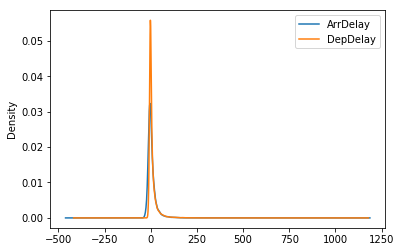

In [4]:
#we can draw a denstiy to show the most delaytime
flights[['ArrDelay','DepDelay']].plot(kind = 'density')

 The second question is: 
Which flight is the fastest from Houston to JFK (or other destination)?
    After choosing a better airport, passengers could know the fastest flight in all flights flying to their destination. As a data analyst, we could analysic the data to find the best flight for passengers to save time.

In [25]:
#only show the data that origin is HOU and destination is JFK for example
f = flights[(flights['Origin'] == 'HOU') & (flights['Dest'] == 'JFK')]

#use flightnumber to group this data and choose the minimun of the actualwlapsedtime to show
f = f.groupby('FlightNum').min().loc[:,'ActualElapsedTime']

print(f)

#now we can see the fastest flights from Houston to JFK

FlightNum
620    165.0
622    179.0
624    168.0
Name: ActualElapsedTime, dtype: float64


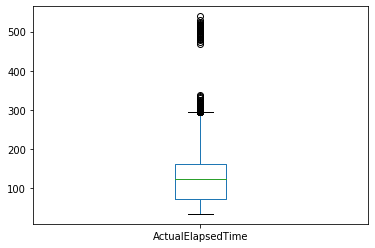

In [26]:
#we can see the mean actualelapsedtime of all the flights
fplot = flights['ActualElapsedTime'].plot(kind = 'box')

The third question is:Show a flights table. 
    When the passenger get to airport, there should be a screen to show the flights information. Show the flights table and then the passengers can find the flight they would take.

In [10]:
#create a new table which only contains the column that passengers need to find information
flights_new = flights.drop(['DayOfWeek','UniqueCarrier','ArrDelay','DepDelay','Cancelled','CancellationCode','Diverted','ifdelay','reparation','TaxiIn','TaxiOut'], axis=1)

#choose one day(Jan 31st as an example) to show that day's whole flights
flights_new.loc[(flights['Month']==1) & (flights['DayofMonth']==31)]

#now we can get the final table that show on the screen to let passengers check the flight they would take

,Year,Month,DayofMonth,DepTime,ArrTime,FlightNum,TailNum,ActualElapsedTime,AirTime,Origin,Dest,Distance
30,2011,1,31,1441.0,1553.0,428,N505AA,72.0,39.0,IAH,DFW,224
61,2011,1,31,718.0,816.0,460,N493AA,58.0,40.0,IAH,DFW,224
87,2011,1,31,1954.0,2105.0,533,N477AA,71.0,38.0,IAH,DFW,224
118,2011,1,31,1656.0,1758.0,1121,N455AA,62.0,41.0,IAH,DFW,224
149,2011,1,31,1757.0,2101.0,1294,N3DJAA,124.0,104.0,IAH,MIA,964
170,2011,1,31,941.0,1054.0,1436,N517AA,73.0,44.0,IAH,DFW,224
201,2011,1,31,1013.0,1336.0,1700,N3FRAA,143.0,100.0,IAH,MIA,964
232,2011,1,31,1205.0,1317.0,1820,N511AA,72.0,42.0,IAH,DFW,224
272,2011,1,31,556.0,857.0,1994,N3BTAA,121.0,106.0,IAH,MIA,964
303,2011,1,31,1827.0,2111.0,731,N607AS,284.0,259.0,IAH,SEA,1874
